## Green Team Final Project 
### Coleton, Barbara, Louis

In [1]:
import os
import gc
import datetime
import re

import pandas as pd
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

from statistics import mean

import numpy as np

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
from matplotlib import __version__ as plt_version

from functools import reduce

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import naive_bayes #Naive Bayes

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.naive_bayes import MultinomialNB

import calendar as cl
from calendar import monthrange

from sklearn import __version__ as sk_version


from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

import pydotplus

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split


from six import StringIO
  
from IPython.display import Image  
from sklearn.tree import export_graphviz


import plotly.express as px
from plotly import __version__ as plotly_version

from tqdm import tqdm
from tqdm import __version__ as tqdm_version

import chart_studio.plotly as py

from plotly import __version__
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
def Model_Performance(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    mean = X_train.mean()
    stdev = X_train.std()
        
    X_train_st = (X_train - mean)/stdev 
    X_test_st = (X_test - mean)/stdev
    
    model.fit(X_train_st,y_train) 

    y_pred_Train = model.predict(X_train_st) #Predictions
    y_pred_Test = model.predict(X_test_st) #Predictions
    
    Metrics(y_test, y_pred_Test)
    
    Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test)
    
    Multiple_Runs(model,X, y)
    
    return

In [3]:
def Metrics(y_test, y_pred_Test):
    print('Test Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return

In [4]:
def Predicted_Plot(y_train, y_pred_Train, y_test, y_pred_Test):

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].grid()
    ax[0].set_xlabel('Observed Label')
    ax[0].set_ylabel('Predicted Label')
    ax[0].set_title('Training Set')

    ax[1].scatter(y_test, y_pred_Test)
    ax[1].grid()
    ax[1].set_xlabel('Observed Label')
    ax[1].set_ylabel('Predicted Label')
    ax[1].set_title('Testing Set')
    plt.show()
    
    return

In [5]:
def Multiple_Runs(model,X, y):

    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in tqdm(range(100)):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        mean = X_train.mean()
        stdev = X_train.std()
        
        X_train_st = (X_train - mean)/stdev 
        X_test_st = (X_test - mean)/stdev 
    
        model.fit(X_train_st, y_train) #Train the model
   
        y_pred_Train  = model.predict(X_train_st)  #Predictions on training model
        y_pred_Test   = model.predict(X_test_st)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()

    print('Train MSE standard deviation:', np.std(Train_MSE))
    print('Test MSE standard deviation: ', np.std(Test_MSE))

    print('\nTrain_R2 standard deviation:', np.std(Train_R2))
    print('Test_R2 standard deviation: ', np.std(Test_R2))

In [6]:
#lag function
#Lag Function
def lag_variable(variable,n_lags):
    """
    Input: Pandas Dataframe
    Output:Same dataframe with their columns lags "n_lags"
    """
    data=pd.DataFrame()
    variables_name=variable.columns.values
    for i in range(1,(n_lags+1)):
        for j in variables_name:
            name=str(j)+'lag_'+ str(i)
            variable[name]=variable[j].shift(i)
    #data = variable.dropna()  # Esto me elimina data vieja que puede ser usada. 
    data = variable
    return data

### Importing the data

In [7]:
#Unemployment Data From US
unem = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/unemployment_report.csv")
unem.index = pd.to_datetime(unem['DATE'])
unem.drop("DATE", axis = 1, inplace = True)
unem.dropna()
#unem.tail()

#GDP data
GDP = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/GDP.csv")
GDP.index = pd.to_datetime(GDP['Date'])
GDP.drop("Date", axis = 1, inplace = True)
GDP.dropna()
#GDP.tail()

#inflation data
inf = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/inflation_monthly.csv")
inf.index = pd.to_datetime(inf['DATE'])
inf.drop("DATE", axis = 1, inplace = True)
inf.dropna()
#inf.tail()

#construction permits
cp = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/construction.csv")
cp.index = pd.to_datetime(cp['DATE'])
cp.drop("DATE", axis = 1, inplace = True)
cp.dropna()
#cp.tail()


#population data
pop = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/population_growth_rate.csv")
pop.index = pd.to_datetime(pop['Date'])
pop.drop("Date", axis = 1, inplace = True)
pop.dropna()
#pop.tail()

#EFFR data
EFFR = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/EFFR.csv")
EFFR.index = pd.to_datetime(EFFR['DATE'])
EFFR.drop("DATE", axis = 1, inplace = True)
EFFR.dropna()
#EFFR.tail()

,EFFR
DATE,
2018-02-01,1.416316
2018-03-01,1.505455
2018-04-01,1.692381
2018-05-01,1.700000
2018-06-01,1.820952
2018-07-01,1.910000
2018-08-01,1.914783
2018-09-01,1.948947
2018-10-01,2.188182


### Creating data that is datetime and not datetime

In [8]:
#Datetime Data. Doesn't have t in data. 
s_dt = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Scaled_sales_Mansfield_WH_SW_Alto_2022.csv")
s_dt = pd.to_datetime(s_dt['Date'])
s_dt = s_dt.drop(columns = ["t"])
s_dt.head()

0   2018-01-01
1   2018-02-01
2   2018-03-01
3   2018-04-01
4   2018-05-01
Name: Date, dtype: datetime64[ns]

In [9]:
#Not Datetime Data, has t in data, no date in data
s = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Scaled_sales_Mansfield_WH_SW_Alto_2022.csv")
s = s.drop(columns = ["Date", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA", "Pop_NA", "Orders_NA"])
s.head()

,t,Orders,Pop_Growth,EFFR,Inflation,GDP,Unem,Permit
0,1,1.266171,0.0057,1.300000,2.1,18437.127,4.0,1335174
1,2,-0.617705,0.0056,1.416316,2.2,18437.127,4.1,1355642
2,3,0.882906,0.0055,1.505455,2.4,18437.127,4.0,1345261
3,4,0.693607,0.0055,1.692381,2.5,18565.697,4.0,1356953
4,5,1.323791,0.0054,1.700000,2.8,18565.697,3.8,1364892


In [10]:
#Not Datetime Data with the NA data, with t in data, no date in data
s_with_NA = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Scaled_sales_Mansfield_WH_SW_Alto_2022.csv")
s_with_NA = s_with_NA.drop(columns = ["Date"])
s_with_NA.head()

,t,Orders,Orders_NA,Pop_Growth,Pop_NA,EFFR,EFFR_NA,Inflation,Inflation_NA,GDP,GDP_NA,Unem,Unem_NA,Permit,Permit_NA
0,1,1.266171,1.266171,0.0057,0.0057,1.300000,1.300000,2.1,2.1,18437.127,18437.127,4.0,4.0,1335174,1335174.0
1,2,-0.617705,-0.617705,0.0056,0.0056,1.416316,1.416316,2.2,2.2,18437.127,18437.127,4.1,4.1,1355642,1355642.0
2,3,0.882906,0.882906,0.0055,0.0055,1.505455,1.505455,2.4,2.4,18437.127,18437.127,4.0,4.0,1345261,1345261.0
3,4,0.693607,0.693607,0.0055,0.0055,1.692381,1.692381,2.5,2.5,18565.697,18565.697,4.0,4.0,1356953,1356953.0
4,5,1.323791,NaN,0.0054,0.0054,1.700000,1.700000,2.8,2.8,18565.697,18565.697,3.8,3.8,1364892,1364892.0


### Finding best lagged variables, before anomaly detection

In [11]:
#MinMaxing and Standardizing the datetime data
sMinMax = (s-s.min())/(s.max()-s.min())
sSTD = (s-s.mean())/s.std()

In [12]:
#Setting X and y
X = sSTD
y = s.Orders
y.head()

0    1.266171
1   -0.617705
2    0.882906
3    0.693607
4    1.323791
Name: Orders, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [14]:
#Training the multiple regression model 

LinearReg = LinearRegression() #Creates the function
LinearReg.fit(X_train, y_train) #Train the model

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: 1.6666709679036273e-11
Coefficients: [-5.06171967e-16  1.00843897e+00 -4.99321043e-16  1.50210777e-16
 -5.87773406e-16  2.31468464e-16  3.20034898e-16  3.15925319e-16]


In [15]:
s_vars = s.drop(columns=['Orders', 't'])
s_vars.head()

,Pop_Growth,EFFR,Inflation,GDP,Unem,Permit
0,0.0057,1.300000,2.1,18437.127,4.0,1335174
1,0.0056,1.416316,2.2,18437.127,4.1,1355642
2,0.0055,1.505455,2.4,18437.127,4.0,1345261
3,0.0055,1.692381,2.5,18565.697,4.0,1356953
4,0.0054,1.700000,2.8,18565.697,3.8,1364892


In [16]:
#lets lag
s_vars_lag = lag_variable(s_vars,12)
s_vars_lag.head()

,Pop_Growth,EFFR,Inflation,GDP,Unem,Permit,Pop_Growthlag_1,EFFRlag_1,Inflationlag_1,GDPlag_1,Unemlag_1,Permitlag_1,Pop_Growthlag_2,EFFRlag_2,Inflationlag_2,GDPlag_2,Unemlag_2,Permitlag_2,Pop_Growthlag_3,EFFRlag_3,Inflationlag_3,GDPlag_3,Unemlag_3,Permitlag_3,Pop_Growthlag_4,EFFRlag_4,Inflationlag_4,GDPlag_4,Unemlag_4,Permitlag_4,Pop_Growthlag_5,EFFRlag_5,Inflationlag_5,GDPlag_5,Unemlag_5,Permitlag_5,Pop_Growthlag_6,EFFRlag_6,Inflationlag_6,GDPlag_6,Unemlag_6,Permitlag_6,Pop_Growthlag_7,EFFRlag_7,Inflationlag_7,GDPlag_7,Unemlag_7,Permitlag_7,Pop_Growthlag_8,EFFRlag_8,Inflationlag_8,GDPlag_8,Unemlag_8,Permitlag_8,Pop_Growthlag_9,EFFRlag_9,Inflationlag_9,GDPlag_9,Unemlag_9,Permitlag_9,Pop_Growthlag_10,EFFRlag_10,Inflationlag_10,GDPlag_10,Unemlag_10,Permitlag_10,Pop_Growthlag_11,EFFRlag_11,Inflationlag_11,GDPlag_11,Unemlag_11,Permitlag_11,Pop_Growthlag_12,EFFRlag_12,Inflationlag_12,GDPlag_12,Unemlag_12,Permitlag_12
0,0.0057,1.300000,2.1,18437.127,4.0,1335174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0056,1.416316,2.2,18437.127,4.1,1355642,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0055,1.505455,2.4,18437.127,4.0,1345261,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0055,1.692381,2.5,18565.697,4.0,1356953,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0054,1.700000,2.8,18565.697,3.8,1364892,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.3,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
s_vars_lag = s_vars_lag.dropna()

In [18]:
s_total_vars = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [s_vars_lag,s])
s_total_vars.head()

,Pop_Growth_x,EFFR_x,Inflation_x,GDP_x,Unem_x,Permit_x,Pop_Growthlag_1,EFFRlag_1,Inflationlag_1,GDPlag_1,Unemlag_1,Permitlag_1,Pop_Growthlag_2,EFFRlag_2,Inflationlag_2,GDPlag_2,Unemlag_2,Permitlag_2,Pop_Growthlag_3,EFFRlag_3,Inflationlag_3,GDPlag_3,Unemlag_3,Permitlag_3,Pop_Growthlag_4,EFFRlag_4,Inflationlag_4,GDPlag_4,Unemlag_4,Permitlag_4,Pop_Growthlag_5,EFFRlag_5,Inflationlag_5,GDPlag_5,Unemlag_5,Permitlag_5,Pop_Growthlag_6,EFFRlag_6,Inflationlag_6,GDPlag_6,Unemlag_6,Permitlag_6,Pop_Growthlag_7,EFFRlag_7,Inflationlag_7,GDPlag_7,Unemlag_7,Permitlag_7,Pop_Growthlag_8,EFFRlag_8,Inflationlag_8,GDPlag_8,Unemlag_8,Permitlag_8,Pop_Growthlag_9,EFFRlag_9,Inflationlag_9,GDPlag_9,Unemlag_9,Permitlag_9,Pop_Growthlag_10,EFFRlag_10,Inflationlag_10,GDPlag_10,Unemlag_10,Permitlag_10,Pop_Growthlag_11,EFFRlag_11,Inflationlag_11,GDPlag_11,Unemlag_11,Permitlag_11,Pop_Growthlag_12,EFFRlag_12,Inflationlag_12,GDPlag_12,Unemlag_12,Permitlag_12,t,Orders,Pop_Growth_y,EFFR_y,Inflation_y,GDP_y,Unem_y,Permit_y
12,0.0049,2.400000,1.6,18835.411,4.0,1294398,0.0050,2.267000,1.9,18733.741,3.9,1287899.0,0.0051,2.19900,2.2,18733.741,3.8,1296961.0,0.0051,2.188182,2.5,18733.741,3.8,1308508.0,0.0051,1.948947,2.3,18699.748,3.7,1325585.0,0.0052,1.914783,2.7,18699.748,3.8,1339536.0,0.0052,1.910000,2.9,18699.748,3.8,1338377.0,0.0053,1.820952,2.9,18565.697,4.0,1346265.0,0.0054,1.700000,2.8,18565.697,3.8,1364892.0,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,13,0.377103,0.0049,2.400000,1.6,18835.411,4.0,1294398
13,0.0049,2.400000,1.5,18835.411,3.8,1312418,0.0049,2.400000,1.6,18835.411,4.0,1294398.0,0.0050,2.26700,1.9,18733.741,3.9,1287899.0,0.0051,2.199000,2.2,18733.741,3.8,1296961.0,0.0051,2.188182,2.5,18733.741,3.8,1308508.0,0.0051,1.948947,2.3,18699.748,3.7,1325585.0,0.0052,1.914783,2.7,18699.748,3.8,1339536.0,0.0052,1.910000,2.9,18699.748,3.8,1338377.0,0.0053,1.820952,2.9,18565.697,4.0,1346265.0,0.0054,1.700000,2.8,18565.697,3.8,1364892.0,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,14,-0.076459,0.0049,2.400000,1.5,18835.411,3.8,1312418
14,0.0049,2.403810,1.9,18835.411,3.8,1323764,0.0049,2.400000,1.5,18835.411,3.8,1312418.0,0.0049,2.40000,1.6,18835.411,4.0,1294398.0,0.0050,2.267000,1.9,18733.741,3.9,1287899.0,0.0051,2.199000,2.2,18733.741,3.8,1296961.0,0.0051,2.188182,2.5,18733.741,3.8,1308508.0,0.0051,1.948947,2.3,18699.748,3.7,1325585.0,0.0052,1.914783,2.7,18699.748,3.8,1339536.0,0.0052,1.910000,2.9,18699.748,3.8,1338377.0,0.0053,1.820952,2.9,18565.697,4.0,1346265.0,0.0054,1.700000,2.8,18565.697,3.8,1364892.0,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,15,0.351609,0.0049,2.403810,1.9,18835.411,3.8,1323764
15,0.0049,2.423182,2.0,18962.175,3.6,1358075,0.0049,2.403810,1.9,18835.411,3.8,1323764.0,0.0049,2.40000,1.5,18835.411,3.8,1312418.0,0.0049,2.400000,1.6,18835.411,4.0,1294398.0,0.0050,2.267000,1.9,18733.741,3.9,1287899.0,0.0051,2.199000,2.2,18733.741,3.8,1296961.0,0.0051,2.188182,2.5,18733.741,3.8,1308508.0,0.0051,1.948947,2.3,18699.748,3.7,1325585.0,0.0052,1.914783,2.7,18699.748,3.8,1339536.0,0.0052,1.910000,2.9,18699.748,3.8,1338377.0,0.0053,1.820952,2.9,18565.697,4.0,1346265.0,0.0054,1.700000,2.8,18565.697,3.8,1364892.0,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,16,0.368904,0.0049,2.423182,2.0,18962.175,3.6,1358075
16,0.0048,2.392727,1.8,18962.175,3.6,1367893,0.0049,2.423182,2.0,18962.175,3.6,1358075.0,0.0049,2.40381,1.9,18835.411,3.8,1323764.0,0.0049,2.400000,1.5,18835.411,3.8,1312418.0,0.0049,2.400000,1.6,18835.411,4.0,1294398.0,0.0050,2.267000,1.9,18733.741,3.9,1287899.0,0.0051,2.199000,2.2,18733.741,3.8,1296961.0,0.0051,2.188182,2.5,18733.741,3.8,1308508.0,0.0051,1.948947,2.3,18699.748,3.7,1325585.0,0.0052,1.914783,2.7,18699.748,3.8,1339536.0,0.0052,1.910000,2.9,18699.748,3.8,1338377.0,0.0053,1.82

In [19]:
corr = s_total_vars.corr()['Orders'].sort_values(ascending=False)
print(corr[corr <= -0.3])
#print(corr[corr <= -0.1])
print(len(corr))
#print(total.columns)
#print(total.shape)
#print(corr)

GDPlag_9          -0.310602
GDPlag_8          -0.328992
Unemlag_12        -0.356263
GDPlag_7          -0.368172
Inflationlag_12   -0.420125
Inflationlag_11   -0.454338
GDPlag_6          -0.466031
Inflationlag_10   -0.481326
Inflationlag_9    -0.500692
GDP_x             -0.513365
GDP_y             -0.513365
Inflationlag_8    -0.516006
Inflationlag_7    -0.531998
Permitlag_7       -0.558373
Inflationlag_6    -0.559282
Permitlag_6       -0.568280
Permitlag_8       -0.569862
Permitlag_9       -0.577195
Permitlag_10      -0.580535
Permitlag_5       -0.582344
Permitlag_12      -0.586875
Permitlag_11      -0.587210
t                 -0.590518
Inflationlag_5    -0.596905
GDPlag_5          -0.597281
Permitlag_4       -0.603045
Permitlag_3       -0.625152
Permitlag_2       -0.629929
Permit_y          -0.634442
Permit_x          -0.634442
GDPlag_1          -0.636513
Inflationlag_4    -0.638579
Permitlag_1       -0.639652
Inflation_x       -0.660455
Inflation_y       -0.660455
Inflationlag_3    -0

In [20]:
s_vars_keep = s_total_vars[["Unemlag_3","Permitlag_3","GDPlag_3","Inflationlag_2","Pop_Growthlag_2","EFFRlag_12","Orders"]].copy()
s_vars_keepT = s_total_vars[["t", "Unemlag_3","Permitlag_3","GDPlag_3","Inflationlag_2","Pop_Growthlag_2","EFFRlag_12","Orders"]].copy()
s_vars_keep = s_vars_keep.dropna()
s_vars_keepT.head()

,t,Unemlag_3,Permitlag_3,GDPlag_3,Inflationlag_2,Pop_Growthlag_2,EFFRlag_12,Orders
12,13,3.8,1308508.0,18733.741,2.2,0.0051,1.300000,0.377103
13,14,3.8,1296961.0,18733.741,1.9,0.0050,1.416316,-0.076459
14,15,3.9,1287899.0,18733.741,1.6,0.0049,1.505455,0.351609
15,16,4.0,1294398.0,18835.411,1.5,0.0049,1.692381,0.368904
16,17,3.8,1312418.0,18835.411,1.9,0.0049,1.700000,0.324950


##### For the lagged variables before taking out the anomalies, we have Unem3, Permit3, GDP3, Inflation2, Pop2, EFFR12. 

## Finding anomalies within orders and the variables, then finding most correlated variables

### Start by finding the anomalies

In [21]:
import numpy as np
print('Numpy:', np.__version__)

import matplotlib.pyplot as plt
from matplotlib import __version__ as plt_v
print('Matplotlib:', np.__version__)

Numpy: 1.21.6
Matplotlib: 1.21.6


In [22]:
def outliers_detection(model, name, Y):
    clf = model
    clf.fit(Y)
    
    outliers = clf.predict(Y)
    
    Y_outliers = Y[np.where(outliers==1)]
    X_outliers = X[np.where(outliers==1)]
    
    Y_inliers = Y[np.where(outliers==0)]
    X_inliers = X[np.where(outliers==0)]
    print(X_outliers)
    
    anomaly_score = model.decision_function(Y)
    plt.plot(anomaly_score)
    plt.ylabel = ('Anomaly_score')
    plt.show()
    
    plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label='outliers')
    plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='green', label='inliers')
    plt.title(name)
    plt.legend()
    plt.grid()
#    plt.ylabel('Y') #Weird error
    plt.xlabel('X')
    plt.show()
    
    return(X_outliers)

#### Finding anomalies in orders

In [23]:
#Datetime Data
s_all = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Scaled_sales_Mansfield_WH_SW_Alto_2022.csv")
#Only keeping orders
s_orders = s_all.drop(columns = ["Date","t", "Pop_Growth", "EFFR", "Inflation", "GDP", "Unem", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])
#Only keeping t
s_t = s_all.drop(columns = ["Date","Orders", "Pop_Growth", "EFFR", "Inflation", "GDP", "Unem", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [24]:
new_array = np.array(s_orders.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[ 4 21 30 31 32 33]


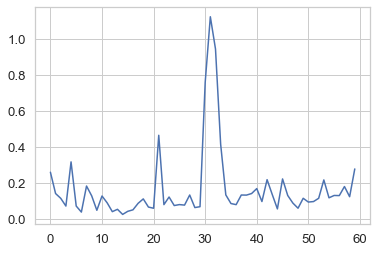

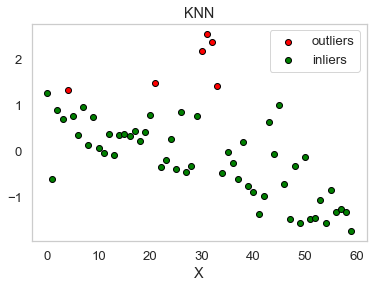

In [25]:
from pyod.models.knn import KNN
model = KNN()
KNN_Outliers = outliers_detection(model, 'KNN', Y)

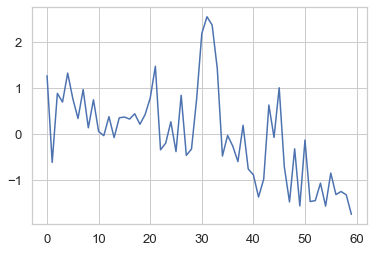

In [26]:
plt.plot(s_orders)

#### Finding anomalies in Population Growth

In [27]:
#Only keeping pop
s_pop = s_all.drop(columns = ["Date","t", "Orders", "EFFR", "Inflation", "GDP", "Unem", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [28]:
new_array = np.array(s_pop.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[27 28 29 39 40 41]


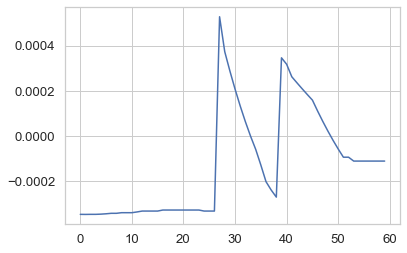

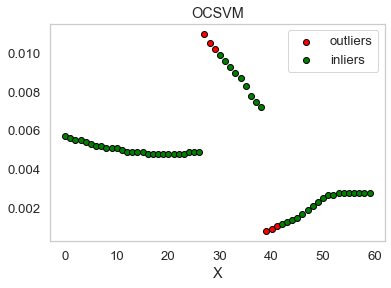

In [29]:
from pyod.models.ocsvm import OCSVM
model = OCSVM()
OCSVM_Outliers = outliers_detection(model, 'OCSVM', Y)

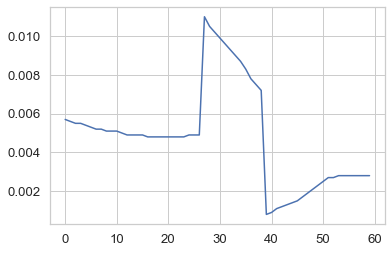

In [30]:
plt.plot(s_pop)

#### Finding anomalies in EFFR

In [31]:
#Only keeping pop
s_effr = s_all.drop(columns = ["Date","t", "Orders", "Pop_Growth", "Inflation", "GDP", "Unem", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [32]:
new_array = np.array(s_effr.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[26 50 51 52 58 59]


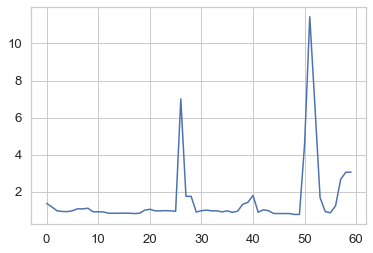

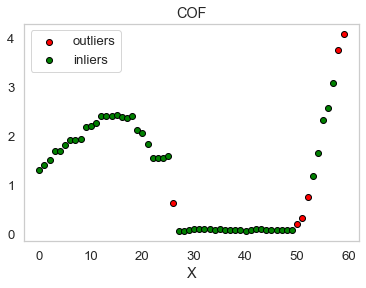

In [33]:
from pyod.models.cof import COF
model = COF()
COF_Outliers = outliers_detection(model, 'COF', Y)

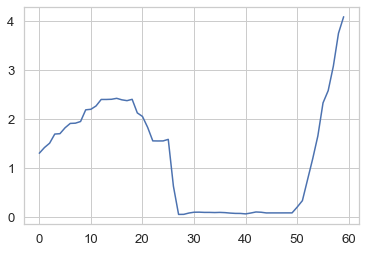

In [34]:
plt.plot(s_effr)

#### Finding anomalies in inflation

In [35]:
#Only keeping pop
s_inf = s_all.drop(columns = ["Date","t", "Orders", "Pop_Growth", "EFFR", "GDP", "Unem", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [36]:
new_array = np.array(s_inf.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[27 28 29 39 40 53]


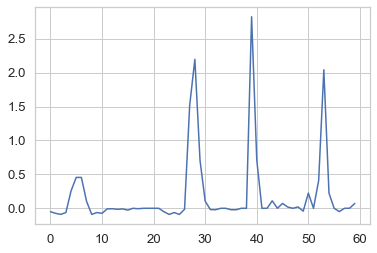

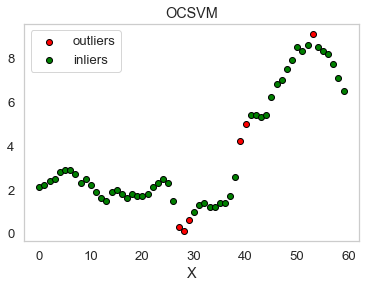

In [37]:
from pyod.models.ocsvm import OCSVM
model = OCSVM()
OCSVM_Outliers = outliers_detection(model, 'OCSVM', Y)

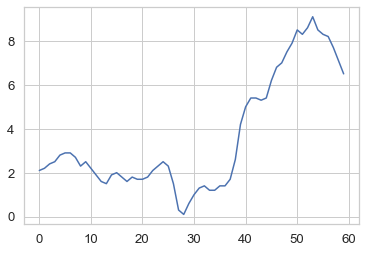

In [38]:
plt.plot(s_inf)

#### Finding anomalies in GDP

In [39]:
#Only keeping pop
s_gdp = s_all.drop(columns = ["Date","t", "Orders", "Pop_Growth", "EFFR", "Inflation", "Unem", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [40]:
new_array = np.array(s_gdp.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[27 28 29 57 58 59]


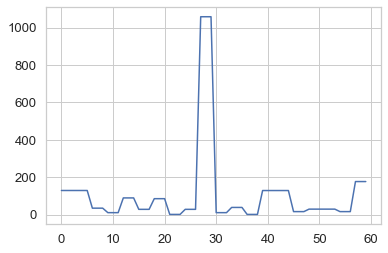

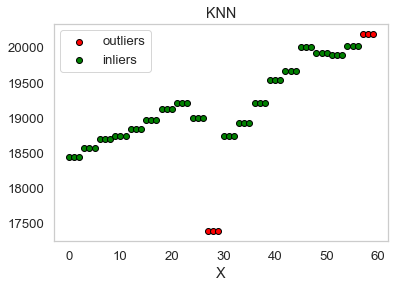

In [41]:
from pyod.models.knn import KNN
model = KNN()
KNN_Outliers = outliers_detection(model, 'KNN', Y)

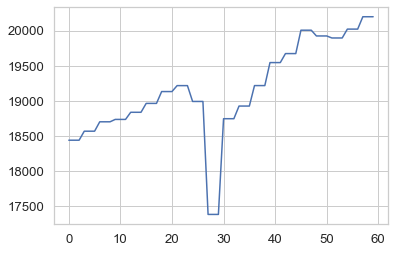

In [42]:
plt.plot(s_gdp)

#### Finding anomalies in Unemployment

In [43]:
#Only keeping pop
s_unem = s_all.drop(columns = ["Date","t", "Orders", "Pop_Growth", "EFFR", "Inflation", "GDP", "Permit", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [44]:
new_array = np.array(s_unem.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


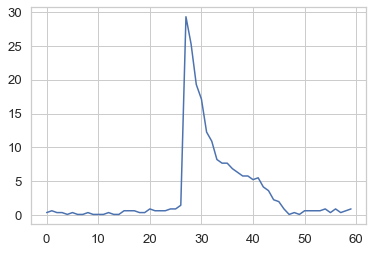

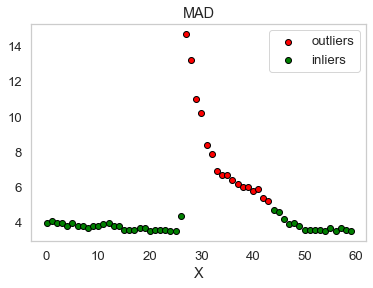

In [45]:
from pyod.models.mad import MAD
model = MAD()
MAD_Outliers = outliers_detection(model, 'MAD', Y)

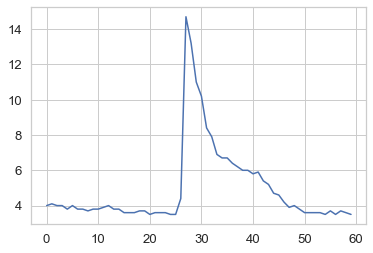

In [46]:
plt.plot(s_unem)

#### Finding anomalies in Permits

In [47]:
#Only keeping pop
s_permit = s_all.drop(columns = ["Date","t", "Orders", "Pop_Growth", "EFFR", "Inflation", "GDP", "Unem", "Orders_NA", "Pop_NA", "EFFR_NA", "Inflation_NA", "GDP_NA", "Unem_NA", "Permit_NA"])

In [48]:
new_array = np.array(s_permit.values)
X = np.arange(0,60)

Y = new_array.reshape(-1, 1) #Changing the shape of the data. Not the scale!!!

[53 54 55 56 57 58]


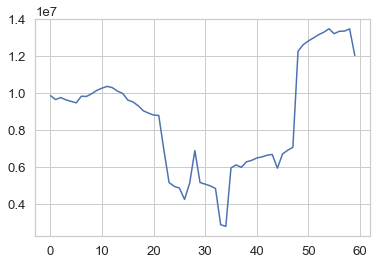

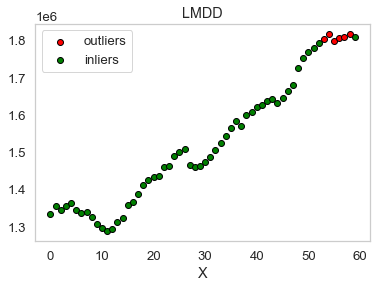

In [49]:
from pyod.models.lmdd import LMDD
model = LMDD()
LMDD_Outliers = outliers_detection(model, 'LMDD', Y)

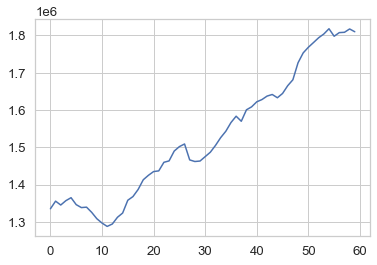

In [50]:
plt.plot(s_permit)

### Dropped all anomaly values found for each variable, now using missingvaluefiller to replace

In [51]:
import pandas as pd
import darts
from darts import TimeSeries

In [52]:
s_na = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Scaled_sales_Mansfield_WH_SW_Alto_2022.csv")
s_na.head()

,Date,t,Orders,Orders_NA,Pop_Growth,Pop_NA,EFFR,EFFR_NA,Inflation,Inflation_NA,GDP,GDP_NA,Unem,Unem_NA,Permit,Permit_NA
0,1/1/2018,1,1.266171,1.266171,0.0057,0.0057,1.300000,1.300000,2.1,2.1,18437.127,18437.127,4.0,4.0,1335174,1335174.0
1,2/1/2018,2,-0.617705,-0.617705,0.0056,0.0056,1.416316,1.416316,2.2,2.2,18437.127,18437.127,4.1,4.1,1355642,1355642.0
2,3/1/2018,3,0.882906,0.882906,0.0055,0.0055,1.505455,1.505455,2.4,2.4,18437.127,18437.127,4.0,4.0,1345261,1345261.0
3,4/1/2018,4,0.693607,0.693607,0.0055,0.0055,1.692381,1.692381,2.5,2.5,18565.697,18565.697,4.0,4.0,1356953,1356953.0
4,5/1/2018,5,1.323791,NaN,0.0054,0.0054,1.700000,1.700000,2.8,2.8,18565.697,18565.697,3.8,3.8,1364892,1364892.0


#### Filling Pop data

In [53]:
#Making the data into a time series dataset, splitting the data into training and validation. 

s_na_series = TimeSeries.from_dataframe(s_na, "Date", "Pop_NA")
train, val = s_na_series[:40], s_na_series[40:]

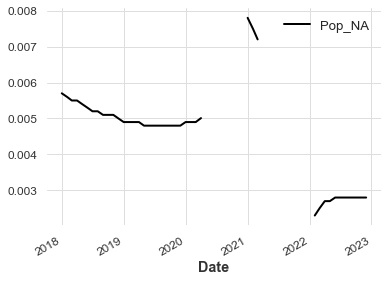

In [54]:
#Importing data with missing values

series2 = TimeSeries.from_dataframe(s_na, "Date", "Pop_NA")
train, val = s_na_series[:40], s_na_series[40:]
series2.plot()

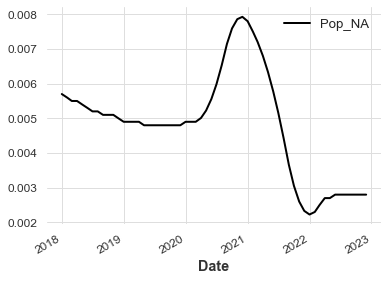

In [55]:
#Using Darts MissingValuesFiller, it fills the missing values fairly accurately. 

from darts.dataprocessing.transformers import MissingValuesFiller

filler = MissingValuesFiller()
filled = filler.transform(series2, method='quadratic')

filled.plot()

In [56]:
print(filled[38:55])

<TimeSeries (DataArray) (Date: 17, component: 1, sample: 1)>
array([[[0.0072    ]],

       [[0.00679978]],

       [[0.00633482]],

       [[0.00577414]],

       [[0.00515391]],

       [[0.00443278]],

       [[0.00366247]],

       [[0.00305464]],

       [[0.00260114]],

       [[0.00233122]],

       [[0.00222688]],

       [[0.0023    ]],

       [[0.0025    ]],

       [[0.0027    ]],

       [[0.0027    ]],

       [[0.0028    ]],

       [[0.0028    ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2021-03-01 2021-04-01 ... 2022-07-01
  * component  (component) object 'Pop_NA'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


#### Filling EFFR data

In [57]:
#Making the data into a time series dataset, splitting the data into training and validation. 

s_na_series = TimeSeries.from_dataframe(s_na, "Date", "EFFR_NA")
train, val = s_na_series[:40], s_na_series[40:]

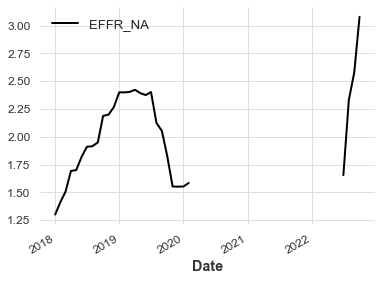

In [58]:
#Importing data with missing values

series2 = TimeSeries.from_dataframe(s_na, "Date", "EFFR_NA")
train, val = s_na_series[:40], s_na_series[40:]
series2.plot()

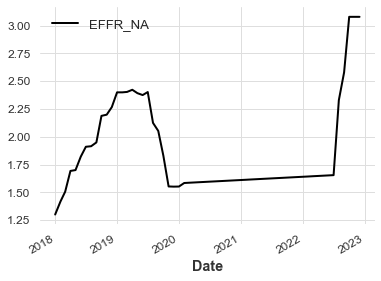

In [59]:
#Using Darts MissingValuesFiller, it fills the missing values fairly accurately. 

from darts.dataprocessing.transformers import MissingValuesFiller

filler = MissingValuesFiller()
filled = filler.transform(series2)

filled.plot()

In [60]:
print(filled[50:60])

<TimeSeries (DataArray) (Date: 10, component: 1, sample: 1)>
array([[[1.6447323 ]],

       [[1.64717423]],

       [[1.64961615]],

       [[1.65205808]],

       [[1.6545    ]],

       [[2.33      ]],

       [[2.58      ]],

       [[3.08      ]],

       [[3.08      ]],

       [[3.08      ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2022-03-01 2022-04-01 ... 2022-12-01
  * component  (component) object 'EFFR_NA'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


#### Filling inflation data

In [61]:
#Making the data into a time series dataset, splitting the data into training and validation. 

s_na_series = TimeSeries.from_dataframe(s_na, "Date", "Inflation_NA")
train, val = s_na_series[:40], s_na_series[40:]

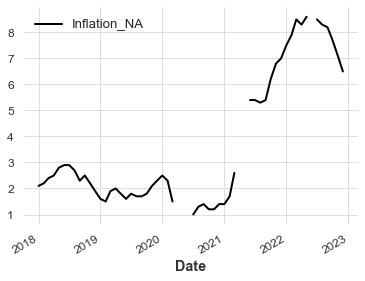

In [62]:
#Importing data with missing values

series2 = TimeSeries.from_dataframe(s_na, "Date", "Inflation_NA")
train, val = s_na_series[:40], s_na_series[40:]
series2.plot()

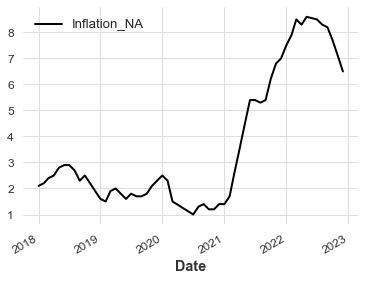

In [63]:
#Using Darts MissingValuesFiller, it fills the missing values fairly accurately. 

from darts.dataprocessing.transformers import MissingValuesFiller

filler = MissingValuesFiller()
filled = filler.transform(series2)

filled.plot()

In [64]:
print(filled[52:57])

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[8.6 ]],

       [[8.55]],

       [[8.5 ]],

       [[8.3 ]],

       [[8.2 ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2022-05-01 2022-06-01 ... 2022-09-01
  * component  (component) object 'Inflation_NA'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


#### Filling GDP Data

In [65]:
#Making the data into a time series dataset, splitting the data into training and validation. 

s_na_series = TimeSeries.from_dataframe(s_na, "Date", "GDP_NA")
train, val = s_na_series[:40], s_na_series[40:]

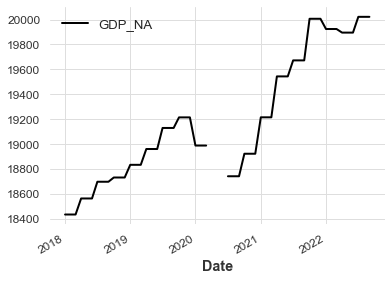

In [66]:
#Importing data with missing values

series2 = TimeSeries.from_dataframe(s_na, "Date", "GDP_NA")
train, val = s_na_series[:40], s_na_series[40:]
series2.plot()

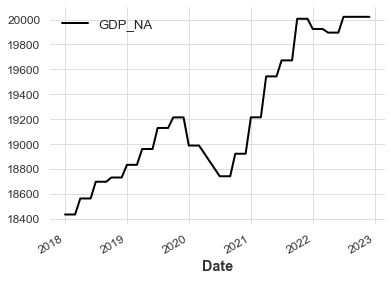

In [67]:
#Using Darts MissingValuesFiller, it fills the missing values fairly accurately. 

from darts.dataprocessing.transformers import MissingValuesFiller

filler = MissingValuesFiller()
filled = filler.transform(series2)

filled.plot()

In [68]:
print(filled[54:60])

<TimeSeries (DataArray) (Date: 6, component: 1, sample: 1)>
array([[[20021.721]],

       [[20021.721]],

       [[20021.721]],

       [[20021.721]],

       [[20021.721]],

       [[20021.721]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2022-07-01 2022-08-01 ... 2022-12-01
  * component  (component) object 'GDP_NA'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


#### Filling Unemployment Data

In [69]:
#Making the data into a time series dataset, splitting the data into training and validation. 

s_na_series = TimeSeries.from_dataframe(s_na, "Date", "Unem_NA")
train, val = s_na_series[:40], s_na_series[40:]

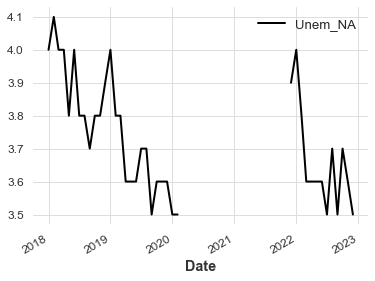

In [70]:
#Importing data with missing values

series2 = TimeSeries.from_dataframe(s_na, "Date", "Unem_NA")
train, val = s_na_series[:40], s_na_series[40:]
series2.plot()

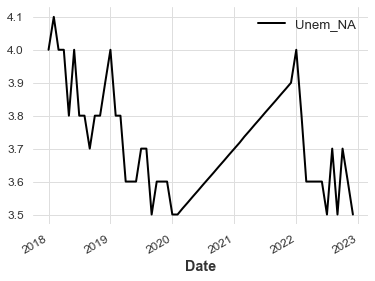

In [71]:
#Using Darts MissingValuesFiller, it fills the missing values fairly accurately. 

from darts.dataprocessing.transformers import MissingValuesFiller

filler = MissingValuesFiller()
filled = filler.transform(series2)

filled.plot()

In [72]:
print(filled[44:49])

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)>
array([[[3.84545455]],

       [[3.86363636]],

       [[3.88181818]],

       [[3.9       ]],

       [[4.        ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2021-09-01 2021-10-01 ... 2022-01-01
  * component  (component) object 'Unem_NA'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


#### Filling Permit Data

In [73]:
#Making the data into a time series dataset, splitting the data into training and validation. 

s_na_series = TimeSeries.from_dataframe(s_na, "Date", "Permit_NA")
train, val = s_na_series[:40], s_na_series[40:]

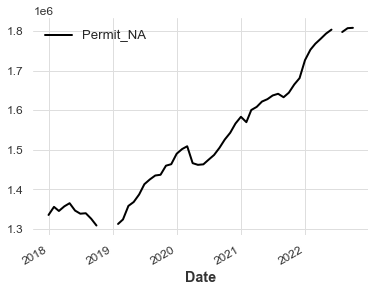

In [74]:
#Importing data with missing values

series2 = TimeSeries.from_dataframe(s_na, "Date", "Permit_NA")
train, val = s_na_series[:40], s_na_series[40:]
series2.plot()

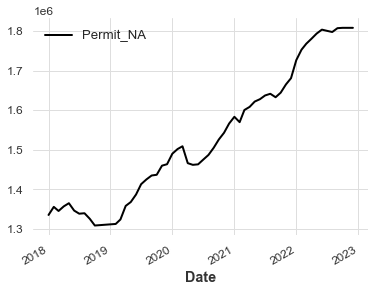

In [75]:
#Using Darts MissingValuesFiller, it fills the missing values fairly accurately. 

from darts.dataprocessing.transformers import MissingValuesFiller

filler = MissingValuesFiller()
filled = filler.transform(series2)

filled.plot()

In [76]:
print(filled[52:60])

<TimeSeries (DataArray) (Date: 8, component: 1, sample: 1)>
array([[[1793778.]],

       [[1803791.]],

       [[1800781.]],

       [[1797771.]],

       [[1807497.]],

       [[1808343.]],

       [[1808343.]],

       [[1808343.]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2022-05-01 2022-06-01 ... 2022-12-01
  * component  (component) object 'Permit_NA'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


# Running the correlations again with the new variables

We need to create one big dataframe with all the new variables so that we can compare it with the new sales data without the outliers.

# Variables No Outliers Legend
* data_fill = orders and variables (autofilled the removed values)
* orders_fill = orders (autofilled the removed values)
* variables_fill = variables (autofilled the removed values)


In [82]:
data_fill = pd.read_csv("C:/Users/colet/Downloads/Adelphi/Optimization & Prescriptive Models/Project Data/Mansfield_NA_filled.csv")
data_fill.head()

,Date,t,Orders,Orders_NA,Pop_Growth,Pop_NA,EFFR,EFFR_NA,Inflation,Inflation_NA,GDP,GDP_NA,Unem,Unem_NA,Permit,Permit_NA
0,1/1/2018,1,1.266171,1.266171,0.0057,0.0057,1.300000,1.300000,2.1,2.1,18437.127,18437.127,4.0,4.0,1335174,1335174.0
1,2/1/2018,2,-0.617705,-0.617705,0.0056,0.0056,1.416316,1.416316,2.2,2.2,18437.127,18437.127,4.1,4.1,1355642,1355642.0
2,3/1/2018,3,0.882906,0.882906,0.0055,0.0055,1.505455,1.505455,2.4,2.4,18437.127,18437.127,4.0,4.0,1345261,1345261.0
3,4/1/2018,4,0.693607,0.693607,0.0055,0.0055,1.692381,1.692381,2.5,2.5,18565.697,18565.697,4.0,4.0,1356953,1356953.0
4,5/1/2018,5,1.323791,1.323791,0.0054,0.0054,1.700000,1.700000,2.8,2.8,18565.697,18565.697,3.8,3.8,1364892,1364892.0


In [83]:
#Orders -> autofilled 
orders_fill = data_fill[['Orders_NA']].copy()
orders_fill

,Orders_NA
0,1.266171
1,-0.617705
2,0.882906
3,0.693607
4,1.323791
5,0.766773
6,0.337406
7,0.965350
8,0.135111
9,0.743251


In [84]:
#Variables -> autofilled
variables_fill = data_fill.drop(columns=['Date', 't','Orders','Orders_NA','Pop_Growth','EFFR','Inflation','GDP','Unem','Permit'])
variables_fill

,Pop_NA,EFFR_NA,Inflation_NA,GDP_NA,Unem_NA,Permit_NA
0,0.005700,1.300000,2.100000,18437.12700,4.000000,1335174.0
1,0.005600,1.416316,2.200000,18437.12700,4.100000,1355642.0
2,0.005500,1.505455,2.400000,18437.12700,4.000000,1345261.0
3,0.005500,1.692381,2.500000,18565.69700,4.000000,1356953.0
4,0.005400,1.700000,2.800000,18565.69700,3.800000,1364892.0
5,0.005300,1.820952,2.900000,18565.69700,4.000000,1346265.0
6,0.005200,1.910000,2.900000,18699.74800,3.800000,1338377.0
7,0.005200,1.914783,2.700000,18699.74800,3.800000,1339536.0
8,0.005100,1.948947,2.300000,18699.74800,3.700000,1325585.0
9,0.005100,2.188182,2.500000,18733.74100,3.800000,1308508.0


In [85]:
#Lagging the autofilled variables
filled_variables_lag = lag_variable(variables_fill,12)
filled_variables_lag.head()

,Pop_NA,EFFR_NA,Inflation_NA,GDP_NA,Unem_NA,Permit_NA,Pop_NAlag_1,EFFR_NAlag_1,Inflation_NAlag_1,GDP_NAlag_1,Unem_NAlag_1,Permit_NAlag_1,Pop_NAlag_2,EFFR_NAlag_2,Inflation_NAlag_2,GDP_NAlag_2,Unem_NAlag_2,Permit_NAlag_2,Pop_NAlag_3,EFFR_NAlag_3,Inflation_NAlag_3,GDP_NAlag_3,Unem_NAlag_3,Permit_NAlag_3,Pop_NAlag_4,EFFR_NAlag_4,Inflation_NAlag_4,GDP_NAlag_4,Unem_NAlag_4,Permit_NAlag_4,Pop_NAlag_5,EFFR_NAlag_5,Inflation_NAlag_5,GDP_NAlag_5,Unem_NAlag_5,Permit_NAlag_5,Pop_NAlag_6,EFFR_NAlag_6,Inflation_NAlag_6,GDP_NAlag_6,Unem_NAlag_6,Permit_NAlag_6,Pop_NAlag_7,EFFR_NAlag_7,Inflation_NAlag_7,GDP_NAlag_7,Unem_NAlag_7,Permit_NAlag_7,Pop_NAlag_8,EFFR_NAlag_8,Inflation_NAlag_8,GDP_NAlag_8,Unem_NAlag_8,Permit_NAlag_8,Pop_NAlag_9,EFFR_NAlag_9,Inflation_NAlag_9,GDP_NAlag_9,Unem_NAlag_9,Permit_NAlag_9,Pop_NAlag_10,EFFR_NAlag_10,Inflation_NAlag_10,GDP_NAlag_10,Unem_NAlag_10,Permit_NAlag_10,Pop_NAlag_11,EFFR_NAlag_11,Inflation_NAlag_11,GDP_NAlag_11,Unem_NAlag_11,Permit_NAlag_11,Pop_NAlag_12,EFFR_NAlag_12,Inflation_NAlag_12,GDP_NAlag_12,Unem_NAlag_12,Permit_NAlag_12
0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0054,1.700000,2.8,18565.697,3.8,1364892.0,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.3,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#We are collecting everything under one frame so that it is easier to see the correlations
lagged_var_and_orders = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='left'),
                 [orders_fill,filled_variables_lag])
lagged_var_and_orders.head()

,Orders_NA,Pop_NA,EFFR_NA,Inflation_NA,GDP_NA,Unem_NA,Permit_NA,Pop_NAlag_1,EFFR_NAlag_1,Inflation_NAlag_1,GDP_NAlag_1,Unem_NAlag_1,Permit_NAlag_1,Pop_NAlag_2,EFFR_NAlag_2,Inflation_NAlag_2,GDP_NAlag_2,Unem_NAlag_2,Permit_NAlag_2,Pop_NAlag_3,EFFR_NAlag_3,Inflation_NAlag_3,GDP_NAlag_3,Unem_NAlag_3,Permit_NAlag_3,Pop_NAlag_4,EFFR_NAlag_4,Inflation_NAlag_4,GDP_NAlag_4,Unem_NAlag_4,Permit_NAlag_4,Pop_NAlag_5,EFFR_NAlag_5,Inflation_NAlag_5,GDP_NAlag_5,Unem_NAlag_5,Permit_NAlag_5,Pop_NAlag_6,EFFR_NAlag_6,Inflation_NAlag_6,GDP_NAlag_6,Unem_NAlag_6,Permit_NAlag_6,Pop_NAlag_7,EFFR_NAlag_7,Inflation_NAlag_7,GDP_NAlag_7,Unem_NAlag_7,Permit_NAlag_7,Pop_NAlag_8,EFFR_NAlag_8,Inflation_NAlag_8,GDP_NAlag_8,Unem_NAlag_8,Permit_NAlag_8,Pop_NAlag_9,EFFR_NAlag_9,Inflation_NAlag_9,GDP_NAlag_9,Unem_NAlag_9,Permit_NAlag_9,Pop_NAlag_10,EFFR_NAlag_10,Inflation_NAlag_10,GDP_NAlag_10,Unem_NAlag_10,Permit_NAlag_10,Pop_NAlag_11,EFFR_NAlag_11,Inflation_NAlag_11,GDP_NAlag_11,Unem_NAlag_11,Permit_NAlag_11,Pop_NAlag_12,EFFR_NAlag_12,Inflation_NAlag_12,GDP_NAlag_12,Unem_NAlag_12,Permit_NAlag_12
0,1.266171,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.617705,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.882906,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.693607,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.300000,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.323791,0.0054,1.700000,2.8,18565.697,3.8,1364892.0,0.0055,1.692381,2.5,18565.697,4.0,1356953.0,0.0055,1.505455,2.4,18437.127,4.0,1345261.0,0.0056,1.416316,2.2,18437.127,4.1,1355642.0,0.0057,1.3,2.1,18437.127,4.0,1335174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
corr = lagged_var_and_orders.corr()['Orders_NA'].sort_values(ascending=False)
print(corr[corr >= -0.4])
print(corr[corr <= -0.45])
print(len(corr))
print(lagged_var_and_orders.columns)
print(lagged_var_and_orders.shape)
#print(corr)

Orders_NA        1.000000
Pop_NA           0.405158
EFFR_NAlag_11    0.403878
EFFR_NAlag_12    0.401600
Pop_NAlag_2      0.388016
Pop_NAlag_1      0.384473
Pop_NAlag_3      0.375024
Pop_NAlag_4      0.364785
EFFR_NAlag_10    0.362500
Pop_NAlag_5      0.352908
Pop_NAlag_6      0.333802
EFFR_NAlag_6     0.314740
Pop_NAlag_7      0.313030
EFFR_NAlag_9     0.300907
EFFR_NAlag_8     0.286776
Pop_NAlag_8      0.285236
EFFR_NAlag_5     0.283213
Pop_NAlag_9      0.259816
Unem_NAlag_2     0.239153
EFFR_NAlag_7     0.231441
Pop_NAlag_10     0.218373
Unem_NA          0.211346
Unem_NAlag_3     0.181614
EFFR_NAlag_4     0.166417
Unem_NAlag_1     0.159241
Pop_NAlag_11     0.156402
Unem_NAlag_4     0.114436
EFFR_NAlag_3     0.099487
Unem_NAlag_7     0.075481
Unem_NAlag_5     0.075052
Pop_NAlag_12     0.066504
Unem_NAlag_12    0.051807
Unem_NAlag_6     0.030149
Unem_NAlag_8     0.024972
EFFR_NAlag_2    -0.034481
Unem_NAlag_9    -0.034547
EFFR_NAlag_1    -0.058547
Unem_NAlag_11   -0.086635
Unem_NAlag_1

## Most Correlated Lags to Orders
* EFFR_NAlag_11
* GDP_NAlag_2
* Inflation_NAlag_1
* Permit_NAlag_2
* Population_no_lag
* Unemployment_lag_2

These will be under "bestvar_" without the NA values.

In [88]:
bestvar = lagged_var_and_orders[["EFFR_NAlag_11","GDP_NAlag_2","Inflation_NAlag_1","Permit_NAlag_2","Pop_NA","Unem_NAlag_2","Orders_NA"]].copy()

<AxesSubplot:>

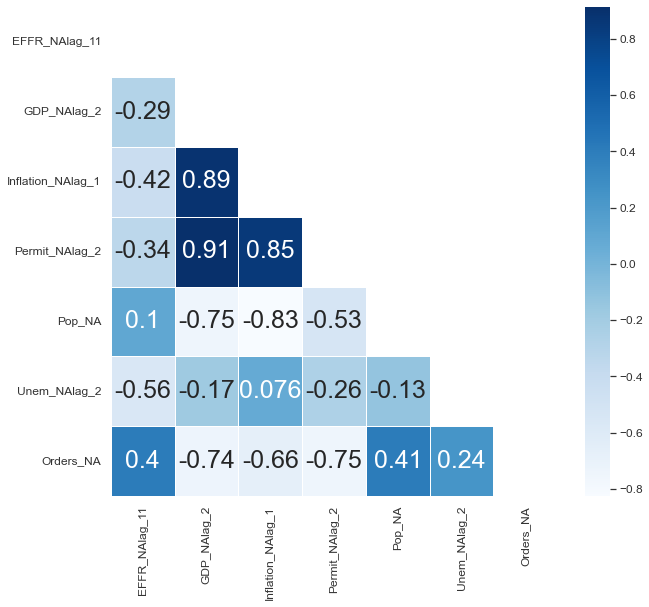

In [89]:
plt.figure(figsize=(10,9))
mask1 = np.triu(np.ones_like(bestvar.corr(), dtype=np.bool))
sns.heatmap(data = bestvar.corr(), annot= True, linewidths=0.5, cmap='Blues', mask=mask1,  annot_kws={"fontsize":25})

# APPLIED MACHINE LEARNING MODELS

Okay so If we want to see predictions with the applied machine learning models, we would have to use at least 3 month lags, so for that we will be creating a separate storage.

In [91]:
varforaml = lagged_var_and_orders[["EFFR_NAlag_11","GDP_NAlag_3","Inflation_NAlag_3","Permit_NAlag_3","Pop_NAlag_3","Unem_NAlag_3","Orders_NA"]].copy()
varforaml

,EFFR_NAlag_11,GDP_NAlag_3,Inflation_NAlag_3,Permit_NAlag_3,Pop_NAlag_3,Unem_NAlag_3,Orders_NA
0,NaN,NaN,NaN,NaN,NaN,NaN,1.266171
1,NaN,NaN,NaN,NaN,NaN,NaN,-0.617705
2,NaN,NaN,NaN,NaN,NaN,NaN,0.882906
3,NaN,18437.12700,2.100000,1335174.0,0.005700,4.000000,0.693607
4,NaN,18437.12700,2.200000,1355642.0,0.005600,4.100000,1.323791
5,NaN,18437.12700,2.400000,1345261.0,0.005500,4.000000,0.766773
6,NaN,18565.69700,2.500000,1356953.0,0.005500,4.000000,0.337406
7,NaN,18565.69700,2.800000,1364892.0,0.005400,3.800000,0.965350
8,NaN,18565.69700,2.900000,1346265.0,0.005300,4.000000,0.135111
9,NaN,18699.74800,2.900000,1338377.0,0.005200,3.800000,0.743251


In [92]:
#MIN MAX
varforaml_minmax = (varforaml-varforaml.min())/(varforaml.max()-varforaml.min())

#STANDARDIZE
varforaml_std = (varforaml-varforaml.mean())/varforaml.std()
varforaml_std.head(12)

,EFFR_NAlag_11,GDP_NAlag_3,Inflation_NAlag_3,Permit_NAlag_3,Pop_NAlag_3,Unem_NAlag_3,Orders_NA
0,NaN,NaN,NaN,NaN,NaN,NaN,1.686169
1,NaN,NaN,NaN,NaN,NaN,NaN,-0.582159
2,NaN,NaN,NaN,NaN,NaN,NaN,1.224690
3,NaN,-1.468389,-0.543833,-1.118241,0.503540,1.754503,0.996758
4,NaN,-1.468389,-0.504395,-0.989905,0.437423,2.391488,1.755547
5,NaN,-1.468389,-0.425518,-1.054995,0.371306,1.754503,1.084857
6,NaN,-1.213630,-0.386080,-0.981685,0.371306,1.754503,0.567866
7,NaN,-1.213630,-0.267765,-0.931907,0.305189,0.480533,1.323958
8,NaN,-1.213630,-0.228327,-1.048700,0.239073,1.754503,0.324287
9,NaN,-0.948011,-0.228327,-1.098158,0.172956,0.480533,1.056534


In [ ]:
varforaml_std_nona = varforaml_std.dropna() #we are dropping NA values from the lagged variables

In [116]:
varforaml_std_nona.head()

,EFFR_NAlag_11,GDP_NAlag_3,Inflation_NAlag_3,Permit_NAlag_3,Pop_NAlag_3,Unem_NAlag_3,Orders_NA
11,-1.573710,-0.948011,-0.464956,-1.178365,0.106839,-0.156453,0.118149
12,-1.205549,-0.880655,-0.386080,-1.285439,0.106839,0.480533,0.615665
13,-0.923409,-0.880655,-0.504395,-1.279310,0.106839,0.480533,0.069541
14,-0.331753,-0.880655,-0.622709,-1.273181,0.040722,1.117518,0.584968
15,-0.307637,-0.679198,-0.741024,-1.267052,-0.025395,1.754503,0.605792


### Splitting data and setting xtest and xtrain

In [93]:
feature_cols = ["EFFR_NAlag_11","GDP_NAlag_3","Inflation_NAlag_3","Permit_NAlag_3","Pop_NAlag_3","Unem_NAlag_3"]

X = varforaml_std_nona[feature_cols] # Features
y = varforaml_std_nona.iloc[:,-1] # Target variable

y.head()
#drop na values

11    0.118149
12    0.615665
13    0.069541
14    0.584968
15    0.605792
Name: Orders_NA, dtype: float64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## MULTIPLE LINEAR REGRESSION

In [95]:
LinearReg = LinearRegression()  
fit = LinearReg.fit(X_train, y_train)

y_pred_Train = LinearReg.predict(X_train) #Predictions on training model
y_pred_Test  = LinearReg.predict(X_test)  #Predictions on testing model

#yhat = fit.predict(0,60)
#s['MultReg'] = yhat 

print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: 0.0036527690630175635
Coefficients: [ 0.38436145 -0.11003391  0.83018207 -0.96064144  0.53857985  0.07736781]


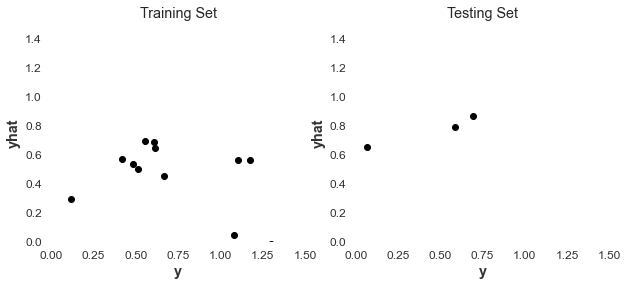

In [96]:
#Two plots togheter

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(0,1.5)
ax[0].set_xlim(0,1.5)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')


ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(0,1.5)
ax[1].set_xlim(0,1.5)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

In [97]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.5350010900938481
Mean Absolute Error: 0.485526802971318
Mean Squared Error: 0.4140542905582881
Root Mean Squared Error: 0.6434705048083308

Testing Metrics:
R squared: 0.5072842715517838
Mean Absolute Error: 0.5115230092323084
Mean Squared Error: 0.44657263100562455
Root Mean Squared Error: 0.6682609004016504


In [98]:
Train_MSE = [] #Empty list to Store MSEs for training data set
Test_MSE = []  #Empty list to Store MSEs for testing data set

Train_R2 = [] #Empty list to Store R2s for training data set
Test_R2 = []  #Empty list to Store R2s for testing data set

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    LinearReg = LinearRegression() #Creates the function
    LinearReg.fit(X_train, y_train) #Train the model
    
    y_pred_Train  = LinearReg.predict(X_train)  #Predictions on training model
    y_pred_Test   = LinearReg.predict(X_test)   #Predictions on testing model
    
    train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
    test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
    train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
    test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
    Train_MSE.append(train_MSE) #Storing the metrics in the lists
    Test_MSE.append(test_MSE) 
    
    Train_R2.append(train_R2) #Storing the metrics in the lists
    Test_R2.append(test_R2)  
    
print('Train MSE median:', np.median(Train_MSE))
print('Test MSE median:', np.median(Test_MSE))

print('\nTrain_R2 median:', np.median(Train_R2))
print('Test_R2 median:', np.median(Test_R2))

Train MSE median: 0.4036353545890456
Test MSE median: 0.525878425829123

Train_R2 median: 0.548848518603417
Test_R2 median: 0.36362877042854647


## PREDICTIONS FOR MULTIPLE LINEAR REGRESSION

In [99]:
#1 Month - change variable values
LinearReg.predict([[-0.56759,1.671448,1.980216,1.801152,-1.413848,-1.430423
]])

array([-1.38775792])

In [100]:
#2 Month - change variable values
LinearReg.predict([[-0.559861,1.671448,1.901339,1.782279,-1.413848,-0.156453
]])

array([-1.39581801])

In [101]:
#3 Month - change variable values
LinearReg.predict([[-0.552131,1.671448,1.861901,1.843262,-1.413848,-1.430423
]])

array([-1.50853337])

## GRADIENT BOOST

In [102]:
feature_cols = ["EFFR_NAlag_11","GDP_NAlag_3","Inflation_NAlag_3","Permit_NAlag_3","Pop_NAlag_3","Unem_NAlag_3"]
varforaml_std_nona = varforaml_std.dropna() #we are dropping NA values from the lagged variables

X = varforaml_std_nona[feature_cols] # Features
y = varforaml_std_nona.iloc[:,-1] # Target variable

#drop na values

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.94it/s]


TypeError: 'str' object is not callable

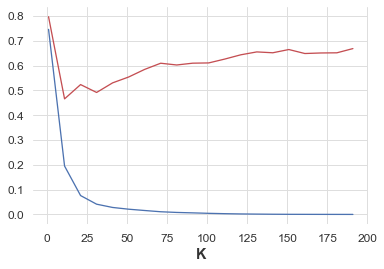

In [103]:
train_mse = []
train_mse = []
pred_mse = []
K = list(range(1,200,10))

for k in tqdm(K):
    
    model = GradientBoostingRegressor(n_estimators=k) #Number of trees in the forest
    model.fit(X_train, y_train.ravel()) #ravel flattens the array

    y_pred_Train = model.predict(X_train) #Predictions
    y_pred_Test = model.predict(X_test) #Predictions
        
    train_mse.append(metrics.mean_squared_error(y_train, y_pred_Train))
    pred_mse.append(metrics.mean_squared_error(y_test, y_pred_Test))
       
plt.plot(K,train_mse,'b')
plt.plot(K,pred_mse,'r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.xticks(K)
plt.show()

Test Metrics:
R squared: 0.4365968656855126
Mean Absolute Error: 0.6321324971465059
Mean Squared Error: 0.645023804713748
Root Mean Squared Error: 0.8031337402411556


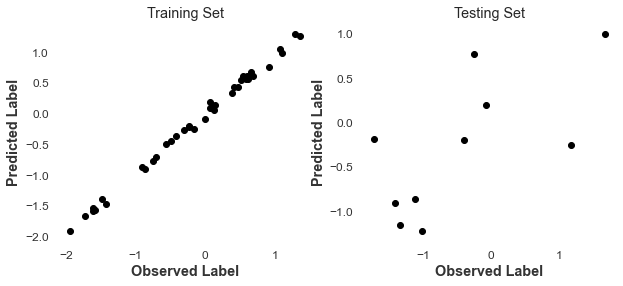

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Train MSE median: 0.0035364142674891063
Test MSE median: 0.7207485291689235

Train_R2 median: 0.9958536089881226
Test_R2 median: 0.08215978192499568


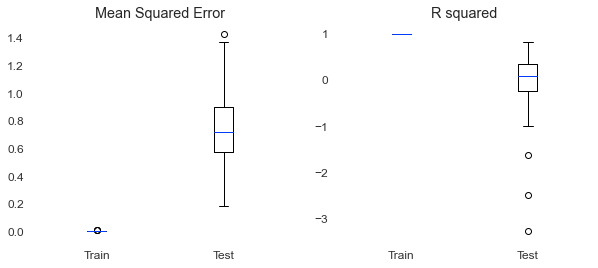

Train MSE standard deviation: 0.0016682136221364701
Test MSE standard deviation:  0.2560532475662906

Train_R2 standard deviation: 0.0019397539786797156
Test_R2 standard deviation:  0.5983806773947989


In [104]:
model = GradientBoostingRegressor(n_estimators=100)
Model_Performance(model,X,y)

<AxesSubplot:>

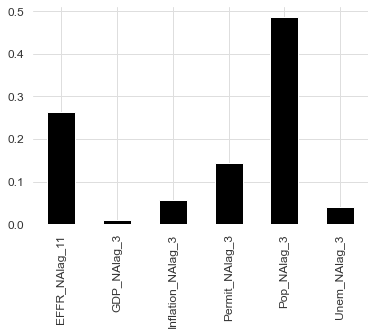

In [105]:
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(X_train,y_train)

Features = varforaml_std_nona.columns[0:6]

Feature_importances = pd.Series(GBR.feature_importances_, index=Features)
Feature_importances.plot.bar()

## PREDICTIONS FOR GRADIENT BOOST

In [106]:
#1 Month - change variable values
GBR.predict([[-0.56759,1.671448,1.980216,1.801152,-1.413848,-1.430423]])

array([-1.33822999])

In [107]:
#2 Month - change variable values
GBR.predict([[-0.559861,1.671448,1.901339,1.782279,-1.413848,-0.156453]])

array([-1.60225857])

In [108]:
#3 Month - change variable values
GBR.predict([[-0.552131,1.671448,1.861901,1.843262,-1.413848,-1.430423]])

array([-1.80242345])

## DECISION TREE

In [109]:
feature_cols = ["EFFR_NAlag_11","GDP_NAlag_3","Inflation_NAlag_3","Permit_NAlag_3","Pop_NAlag_3","Unem_NAlag_3"]
varforaml_std_nona = varforaml_std.dropna() #we are dropping NA values from the lagged variables

X = varforaml_std_nona[feature_cols] # Features
y = varforaml_std_nona.iloc[:,-1] # Target variable

y.head()
#drop na values

11    0.118149
12    0.615665
13    0.069541
14    0.584968
15    0.605792
Name: Orders_NA, dtype: float64

100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 102.67it/s]


TypeError: 'str' object is not callable

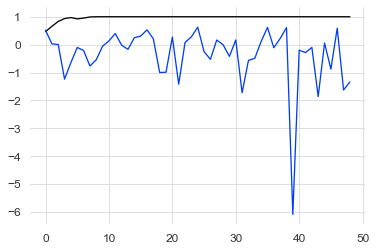

In [110]:
#Learning curves
train_R2 =[]
test_R2=[]

for depth in tqdm(range(1,50)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 
    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(X_train,y_train)
    y_pred_Train = dtree.predict(X_train) #Predictions
    y_pred_Test = dtree.predict(X_test) #Predictions
    train_R2.append(metrics.r2_score(y_train,y_pred_Train))
    test_R2.append(metrics.r2_score(y_test, y_pred_Test))

plt.plot(train_R2)
plt.plot(test_R2)
plt.ylabel('R2')
plt.xlabel('depth')
plt.show()

In [111]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0

Testing Metrics:
R squared: -1.337471768000725
Mean Absolute Error: 0.7342374986993567
Mean Squared Error: 0.8565755882311354
Root Mean Squared Error: 0.9255136888404922


## PREDICTIONS FOR DECISION TREE

In [112]:
#1 Month
dtree.predict([[-0.56759,1.671448,1.980216,1.801152,-1.413848,-1.430423]])

array([-1.34305224])

In [113]:
#2 Month
dtree.predict([[-0.559861,1.671448,1.901339,1.782279,-1.413848,-0.156453]])

array([-1.42969391])

In [114]:
#3 Month
dtree.predict([[-0.552131,1.671448,1.861901,1.843262,-1.413848,-1.430423]])

array([-1.94231481])

# PREDICTIVE AND NEURAL NETWORK MODELS

## Reinstating Most correlated lags found above

In [128]:
varforpm = lagged_var_and_orders[["EFFR_NAlag_11","GDP_NAlag_2","Inflation_NAlag_1","Permit_NAlag_2","Pop_NA","Unem_NAlag_2","Orders_NA"]].copy()
varforpm

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA
0,NaN,NaN,NaN,NaN,0.005700,NaN,1.266171
1,NaN,NaN,2.100000,NaN,0.005600,NaN,-0.617705
2,NaN,18437.12700,2.200000,1335174.0,0.005500,4.000000,0.882906
3,NaN,18437.12700,2.400000,1355642.0,0.005500,4.100000,0.693607
4,NaN,18437.12700,2.500000,1345261.0,0.005400,4.000000,1.323791
5,NaN,18565.69700,2.800000,1356953.0,0.005300,4.000000,0.766773
6,NaN,18565.69700,2.900000,1364892.0,0.005200,3.800000,0.337406
7,NaN,18565.69700,2.900000,1346265.0,0.005200,4.000000,0.965350
8,NaN,18699.74800,2.700000,1338377.0,0.005100,3.800000,0.135111
9,NaN,18699.74800,2.300000,1339536.0,0.005100,3.800000,0.743251


In [130]:
#Dropping NA's
varforpm = varforpm.dropna() #we are dropping NA values from the lagged variables
varforpm.head()

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA
11,1.300000,18733.741,2.2,1308508.0,0.0050,3.8,-0.036090
12,1.416316,18733.741,1.9,1309485.5,0.0049,3.8,0.377103
13,1.505455,18733.741,1.6,1310463.0,0.0049,3.9,-0.076459
14,1.692381,18835.411,1.5,1311440.5,0.0049,4.0,0.351609
15,1.700000,18835.411,1.9,1312418.0,0.0049,3.8,0.368904


In [185]:
varforpm.head()

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA
11,1.300000,18733.741,2.2,1308508.0,0.0050,3.8,-0.036090
12,1.416316,18733.741,1.9,1309485.5,0.0049,3.8,0.377103
13,1.505455,18733.741,1.6,1310463.0,0.0049,3.9,-0.076459
14,1.692381,18835.411,1.5,1311440.5,0.0049,4.0,0.351609
15,1.700000,18835.411,1.9,1312418.0,0.0049,3.8,0.368904


In [131]:
#STANDARDIZE
varforpm_std = (varforpm-varforpm.mean())/varforpm.std()
varforpm_std.head(12)

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA
11,-1.573710,-1.215661,-0.584042,-1.537334,0.166687,0.823587,0.330160
12,-1.205549,-1.215661,-0.691360,-1.531122,0.107547,0.823587,0.850923
13,-0.923409,-1.215661,-0.798678,-1.524910,0.107547,1.570917,0.279281
14,-0.331753,-1.000269,-0.834450,-1.518699,0.107547,2.318246,0.818792
15,-0.307637,-1.000269,-0.691360,-1.512487,0.107547,0.823587,0.840589
16,0.075200,-1.000269,-0.655587,-1.440389,0.048407,0.823587,0.785192
17,0.357052,-0.731715,-0.727132,-1.222357,0.048407,-0.671071,0.930150
18,0.372190,-0.731715,-0.798678,-1.159968,0.048407,-0.671071,0.642832
19,0.480327,-0.731715,-0.727132,-1.039314,0.048407,-0.671071,0.903948
20,1.237548,-0.374197,-0.762905,-0.873365,0.048407,0.076258,1.359714


In [132]:
t_col = s[["t"]].copy()
#t_col.head()

In [135]:
#Creating std df with t
varforpm_std_t = pd.concat([varforpm_std_nona, t_col], axis=1, join='inner')
#varforpm_std_t

In [136]:
#Creating df not std with t
varforpm_with_t_nostd = pd.concat([varforpm, t_col], axis=1, join='inner')
#varforpm_with_t_nostd

## Running SARIMA and SARIMAX Models

In [138]:
from statsmodels.tools.eval_measures import rmse, meanabs, rmspe

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

C:\Users\colet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\colet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\colet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\colet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



                                     SARIMAX Results                                      
Dep. Variable:                          Orders_NA   No. Observations:                   49
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                 -42.318
Date:                            Mon, 20 Mar 2023   AIC                             98.636
Time:                                    21:20:25   BIC                            109.721
Sample:                                         0   HQIC                           102.505
                                             - 49                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6041      0.421     -1.436      0.151      -1.429       0.220
ma.L1          0.1440   1079.987   

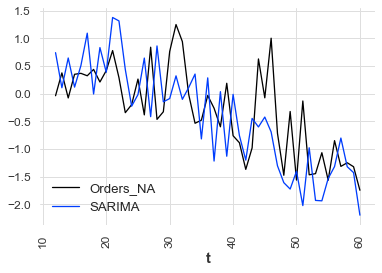

In [139]:
model = SARIMAX(varforpm_std['Orders_NA'], order=(1, 1, 2), seasonal_order=(1, 1, 2, 12)).fit() #Pink Messages
print(model.summary())

yhat = model.predict(0,60)
varforpm_with_t_nostd['SARIMA'] = yhat
varforpm_with_t_nostd.tail()

varforpm_with_t_nostd.plot.line('t', ['Orders_NA', 'SARIMA'])

plt.xticks(rotation=90)
plt.show()

In [141]:
print('\n\nNext three months forecast:',)
model.predict(61,63)



Next three months forecast:


C:\Users\colet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



61   -1.844857
62   -2.608808
63   -1.441663
Name: predicted_mean, dtype: float64

In [143]:
RMSE = rmse(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'SARIMA'])
MAD = meanabs(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'SARIMA'])
RMSPE= rmspe(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'SARIMA'])

print('RMSE:', RMSE)
print('MAD:',  MAD)
print('RMSPE:',RMSPE)

RMSE: 0.7699792584751857
MAD: 0.6215924757021326
RMSPE: 48.06521334603053


In [145]:
varforpm_with_t_nostd.head()

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA,t,SARIMA,SARIMAX
11,1.300000,18733.741,2.2,1308508.0,0.0050,3.8,-0.036090,12,0.743180,1.388203
12,1.416316,18733.741,1.9,1309485.5,0.0049,3.8,0.377103,13,0.108085,0.292157
13,1.505455,18733.741,1.6,1310463.0,0.0049,3.9,-0.076459,14,0.646672,0.816523
14,1.692381,18835.411,1.5,1311440.5,0.0049,4.0,0.351609,15,0.119403,0.103533
15,1.700000,18835.411,1.9,1312418.0,0.0049,3.8,0.368904,16,0.509501,0.282797


C:\Users\colet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\colet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\colet\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      SARIMAX Results                                       
Dep. Variable:                            Orders_NA   No. Observations:                   49
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -35.130
Date:                              Mon, 20 Mar 2023   AIC                             92.260
Time:                                      21:27:37   BIC                            109.679
Sample:                                           0   HQIC                            98.340
                                               - 49                                         
Covariance Type:                                opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
EFFR_NAlag_11         0.0510      0.274      0.186      0.852      -0.485       0.58

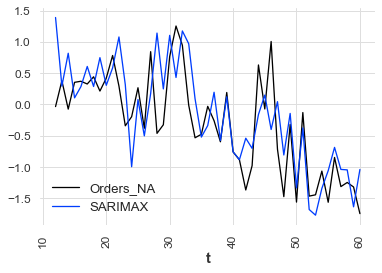

RMSE: 0.5845716049033575
MAD: 0.44691109352280883
RMSPE: 0.5845716049033575


In [149]:
model = SARIMAX(varforpm_std_t['Orders_NA'], exog=varforpm_std_t[["EFFR_NAlag_11","GDP_NAlag_2","Inflation_NAlag_1","Permit_NAlag_2","Pop_NA","Unem_NAlag_2"]], order=(1, 1, 2), seasonal_order=(0, 1, 1, 12)).fit() #Pink Menewdropnewdropagenewdrop
print(model.summary()) #exog=newdrop[['EX1', 'EX2']]

yhat = model.predict(0,48)
varforpm_with_t_nostd['SARIMAX'] = yhat
#varforpm_with_t_nostd.head()

varforpm_with_t_nostd.plot.line('t', ['Orders_NA', 'SARIMAX'])
plt.xticks(rotation=90)
plt.show()

RMSE = rmse(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'SARIMAX'])
MAD = meanabs(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'SARIMAX'])
RMSPE= rmse(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'SARIMAX'])

print('RMSE:', RMSE)
print('MAD:',  MAD)
print('RMSPE:',RMSPE)

In [156]:
varforpm_with_t_nostd.head()

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA,t,SARIMA,SARIMAX
11,1.300000,18733.741,2.2,1308508.0,0.0050,3.8,-0.036090,12,0.743180,1.388203
12,1.416316,18733.741,1.9,1309485.5,0.0049,3.8,0.377103,13,0.108085,0.292157
13,1.505455,18733.741,1.6,1310463.0,0.0049,3.9,-0.076459,14,0.646672,0.816523
14,1.692381,18835.411,1.5,1311440.5,0.0049,4.0,0.351609,15,0.119403,0.103533
15,1.700000,18835.411,1.9,1312418.0,0.0049,3.8,0.368904,16,0.509501,0.282797


## Holt Winters Model

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Orders_NA   No. Observations:                   49
Model:             ExponentialSmoothing   SSE                             14.823
Optimized:                         True   AIC                            -26.585
Trend:                         Additive   BIC                              3.684
Seasonal:                      Additive   AICC                            -3.785
Seasonal Periods:                    12   Date:                 Tue, 21 Mar 2023
Box-Cox:                          False   Time:                         18:11:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1165361                alpha                 True
smoothing_trend          

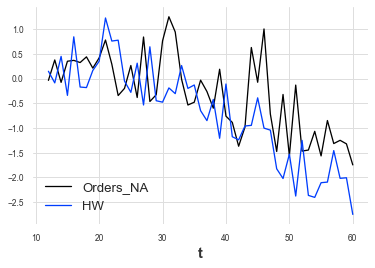

AttributeError: 'Series' object has no attribute 'width'

In [197]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(varforpm_std_t['Orders_NA'],trend = 'add', seasonal='add', seasonal_periods=12).fit()

print(model.summary())

yhat = model.predict(0,60)
varforpm_with_t_nostd['HW'] = yhat

varforpm_with_t_nostd.plot.line('t', ['Orders_NA', 'HW'])
plt.show()

RMSE  = rmse(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'HW'])
MAD   = meanabs(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'HW'])
RMSPE = rmspe(varforpm_with_t_nostd.loc[1:,'Orders_NA'], varforpm_with_t_nostd.loc[1:,'HW'])

print('RMSE:', RMSE)
print('MAD:',  MAD)
print('RMSPE:',RMSPE)


In [198]:
print('\n\nNext three months forecast:',)
model.predict(61,63)



Next three months forecast:


61   -2.508967
62   -3.355948
63   -2.229493
dtype: float64

In [210]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(varforpm_with_t_nostd['Orders_NA'], varforpm_with_t_nostd['HW']))

R2 Score -0.24432051963784152


In [203]:
varforpm_with_t_nostd.head(30)

,EFFR_NAlag_11,GDP_NAlag_2,Inflation_NAlag_1,Permit_NAlag_2,Pop_NA,Unem_NAlag_2,Orders_NA,t,SARIMA,SARIMAX,HW
11,1.300000,18733.74100,2.200000,1308508.0,0.005000,3.800000,-0.036090,12,0.743180,1.388203,0.148091
12,1.416316,18733.74100,1.900000,1309485.5,0.004900,3.800000,0.377103,13,0.108085,0.292157,-0.086819
13,1.505455,18733.74100,1.600000,1310463.0,0.004900,3.900000,-0.076459,14,0.646672,0.816523,0.449914
14,1.692381,18835.41100,1.500000,1311440.5,0.004900,4.000000,0.351609,15,0.119403,0.103533,-0.339883
15,1.700000,18835.41100,1.900000,1312418.0,0.004900,3.800000,0.368904,16,0.509501,0.282797,0.845437
16,1.820952,18835.41100,2.000000,1323764.0,0.004800,3.800000,0.324950,17,1.095947,0.605371,-0.171011
17,1.910000,18962.17500,1.800000,1358075.0,0.004800,3.600000,0.439965,18,-0.005047,0.285124,-0.181998
18,1.914783,18962.17500,1.600000,1367893.0,0.004800,3.600000,0.211996,19,0.835143,0.746387,0.164253
19,1.948947,18962.17500,1.800000,1386880.0,0.004800,3.600000,0.419175,20,0.388233,0.304125,0.350627
20,2.188182,19130.93200,1.700000,1412995.0,0.004800,3.700000,0.780797,21,1.379680,0.582589,1.227262


In [209]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(varforpm_std_t['Orders_NA'], varforpm_with_t_nostd['SARIMAX']))

R2 Score 0.5429602220992211
